# AI 4. 决策树 (Decision Tree)

> 参考：
> - Meduim Blog: [Decision Trees in Machine Learning](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052)
> - SK-learn Document: [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

![](./pics/blue.png)
##  1. 简介

决策树是一个非常符合直觉的算法。通过多层的的 (if, else) 条件，完成对于数据的分区（分类，和回归）。此外对决策树算法是另外一个更加强大的算法 -- 随机森林算法的基础。通常对于一个多特征的数据集，使用随机森林算法做出的预测要好于绝大多数的线性回归或分类算法。

举一个比较简单的例子来展示决策树。银行要判断一个人是否具有贷款的资格，那么需要进行以下的条件判断，这个人的收入情况，这个是否有房产。

![贷款模型](./pics/loan.png)

这是一个手动设定的分类型决策树，整体逻辑都非常简单。但通常在数据科学中，我们所使用的决策树是通过数据驱动而不断修改条件的。下面，我将手动展示创建一个决策树的过程。

![](./pics/green.png)

## 2. 基于熵的分类决策树

> 在这里我们使用的数据是 sk-learn 的鸢尾花数据集。

### 2.1 探索数据

首先我们导入数据，并简单的探索一下。

> 由于是做例子，所以这里我只选择了数据集中的两个特征，这样便于画图。

In [43]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris()
# Create a dataframe from the iris dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Drop the first two columns
df = df.drop(columns=['sepal length (cm)', 'sepal width (cm)'])
# Add the target column
df['target'] = iris.target
# Show the shape and the first five rows
print(df.shape)
print(df.head())

(150, 3)
   petal length (cm)  petal width (cm)  target
0                1.4               0.2       0
1                1.4               0.2       0
2                1.3               0.2       0
3                1.5               0.2       0
4                1.4               0.2       0


用散点图将数据可视化。

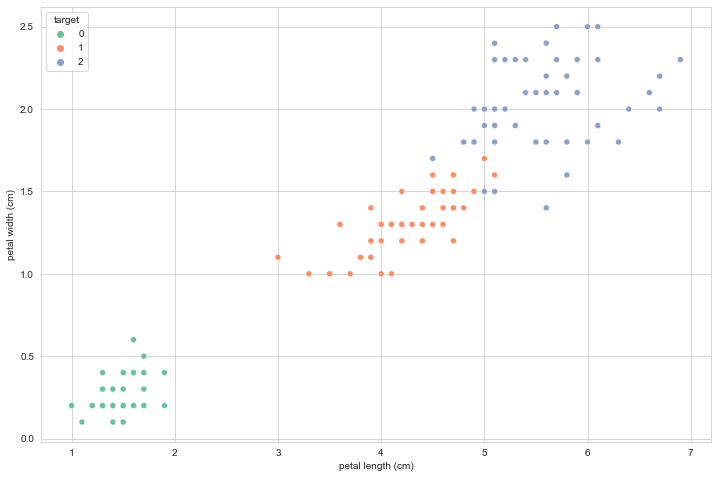

In [53]:
# Create a scatter plot of the first two columns using seabron
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=df, hue='target', palette='Set2')
plt.show()


我们用肉眼可以之间看出来，着三个种类的数据的区分依据是

### 2.2 构建一棵树

在构建一棵树的时候，我们首先需要确定树的最顶端的特征和条件应该是什么。对于本题来说，使用 `petal length` 特征，还是 `petal width` 特征。因为，我们需要分别对于